In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
#style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [3]:
titanic = sns.load_dataset('titanic')


In [4]:
# Displaing basic information
print("="*50)
print("DATASET INFORMATION")
print("="*50)
print(titanic.info())

print("\n" + "="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)
print(titanic.describe(include='all'))

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

DESCRIPTIVE STATISTICS
          survived      pclass

In [5]:
# Missing values analysis
print("\n" + "="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)
missing_data = titanic.isnull().sum().sort_values(ascending=False)
missing_percent = (titanic.isnull().sum() / titanic.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([missing_data, missing_percent], axis=1, keys=['Total Missing', 'Percent Missing'])
print(missing_df)


MISSING VALUES ANALYSIS
             Total Missing  Percent Missing
deck                   688         0.772166
age                    177         0.198653
embarked                 2         0.002245
embark_town              2         0.002245
survived                 0         0.000000
pclass                   0         0.000000
sex                      0         0.000000
sibsp                    0         0.000000
parch                    0         0.000000
fare                     0         0.000000
class                    0         0.000000
who                      0         0.000000
adult_male               0         0.000000
alive                    0         0.000000
alone                    0         0.000000


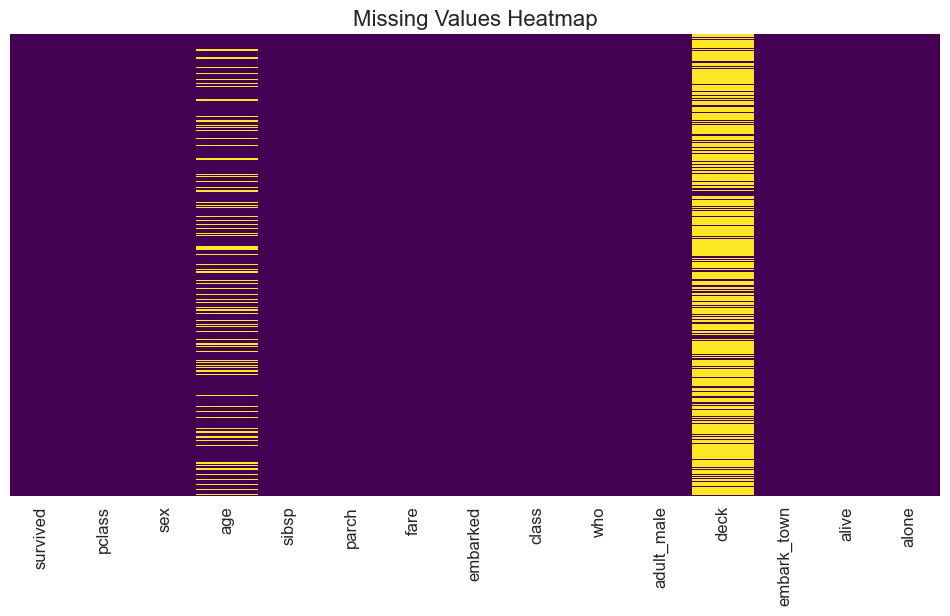

In [6]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=16)
plt.show()

In [7]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.



DATA DISTRIBUTION ANALYSIS


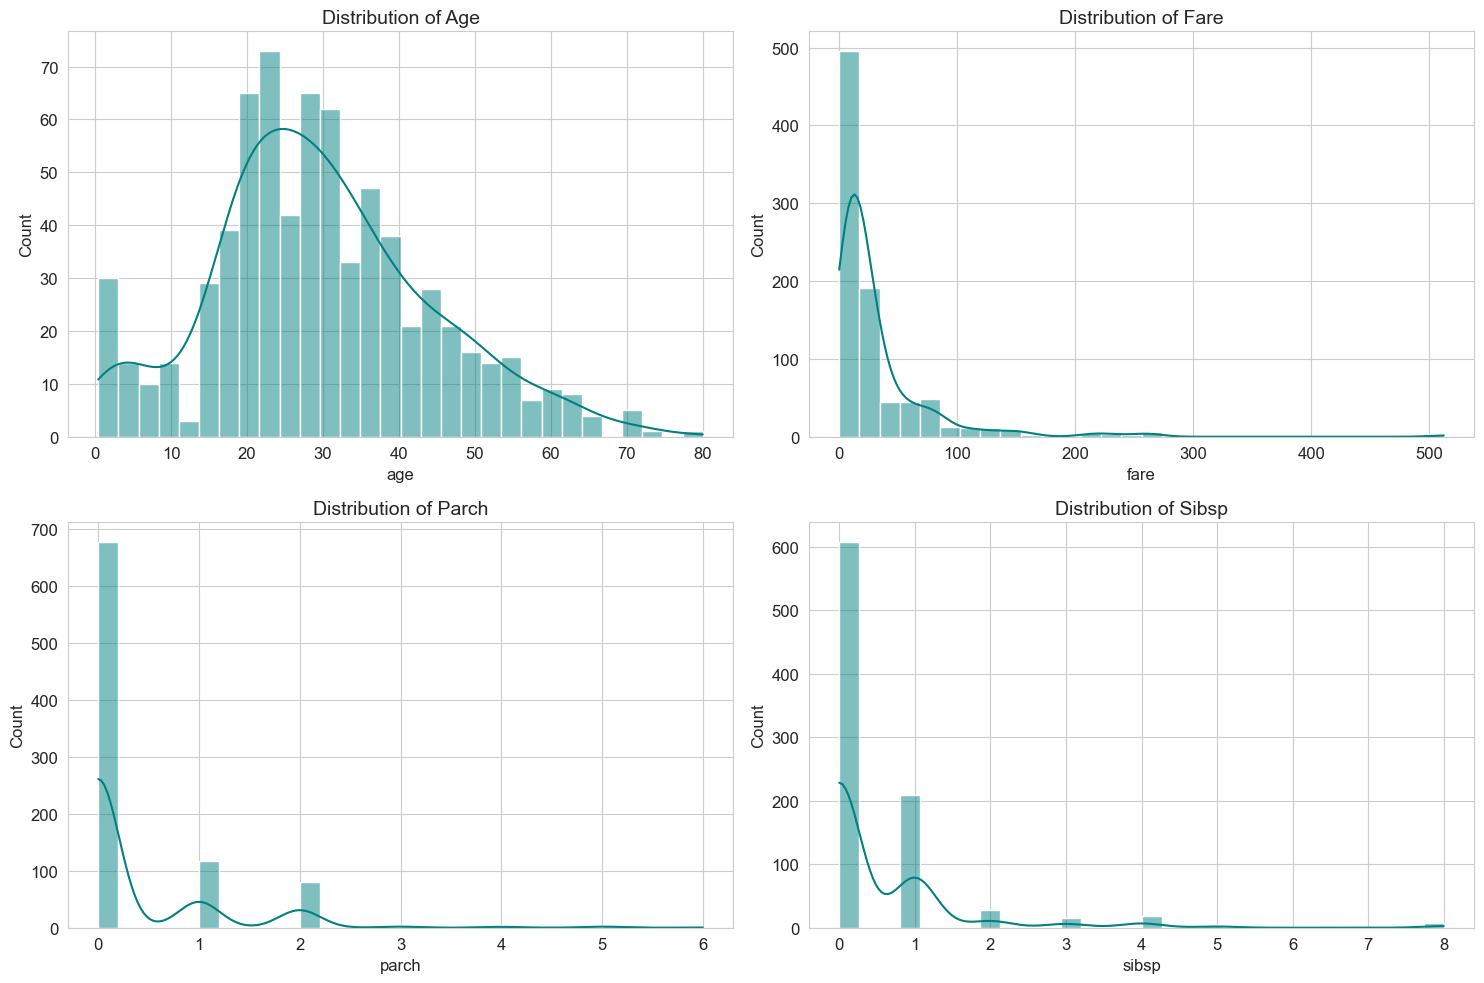

In [8]:
# Data Distribution Analysis
print("\n" + "="*50)
print("DATA DISTRIBUTION ANALYSIS")
print("="*50)

# Numerical features distribution
num_cols = ['age', 'fare', 'parch', 'sibsp']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    
    # Clean infinite values if any exist
    data = titanic[col].replace([np.inf, -np.inf], np.nan).dropna()
    
    sns.histplot(data, kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14)
    
plt.tight_layout()
plt.show()


OUTLIER DETECTION


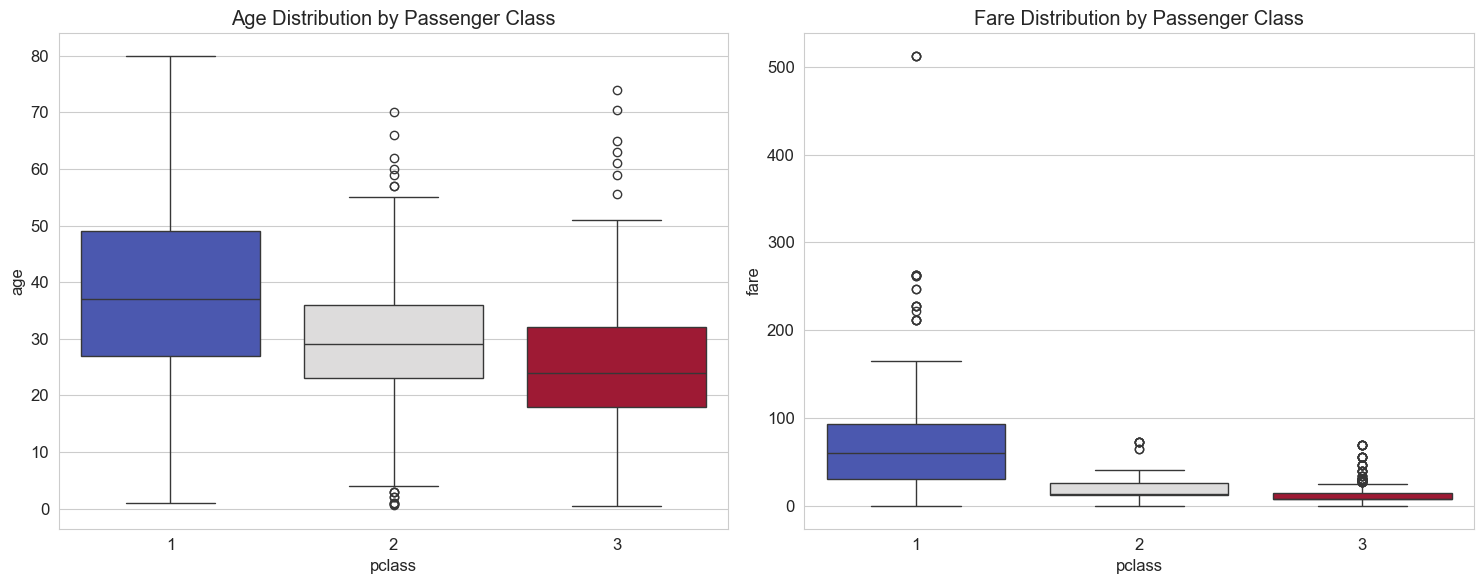

In [9]:
# Outlier Detection
print("\n" + "="*50)
print("OUTLIER DETECTION")
print("="*50)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='pclass', y='age', data=titanic, hue='pclass', palette='coolwarm', legend=False)
plt.title('Age Distribution by Passenger Class')
plt.subplot(1, 2, 2)
sns.boxplot(x='pclass', y='fare', data=titanic, hue='pclass', palette='coolwarm', legend=False)
plt.title('Fare Distribution by Passenger Class')
plt.tight_layout()
plt.show()

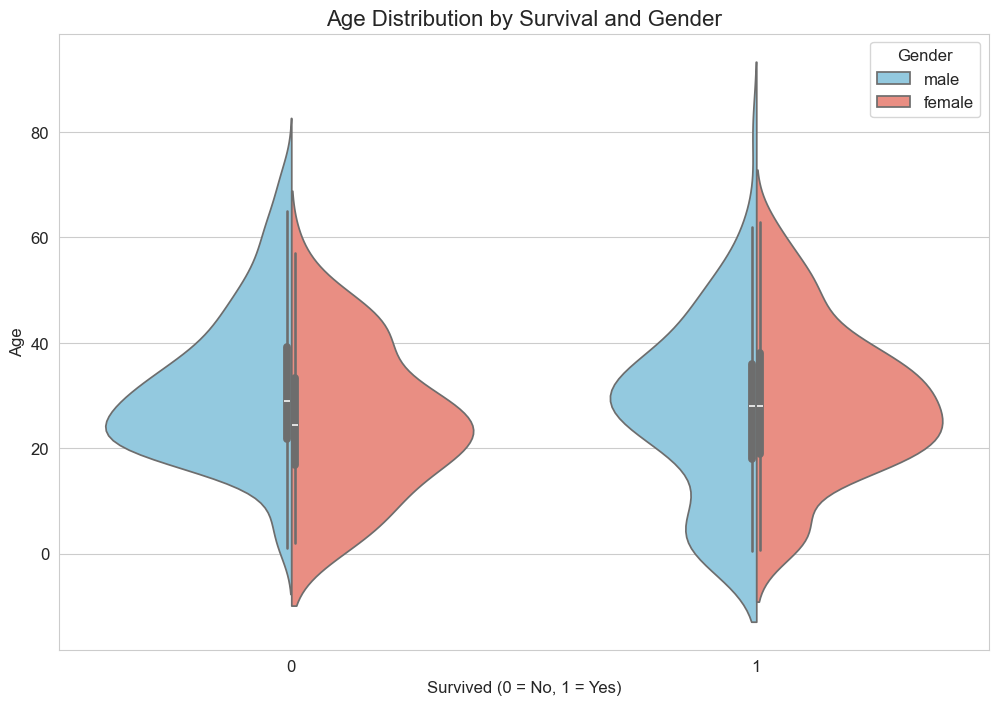

In [10]:
# Advanced visualization: Age distribution by survival and gender
plt.figure(figsize=(12, 8))
sns.violinplot(x='survived', y='age', hue='sex', data=titanic, split=True, 
               palette={'male': 'skyblue', 'female': 'salmon'})
plt.title('Age Distribution by Survival and Gender', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()


RELATIONSHIP ANALYSIS


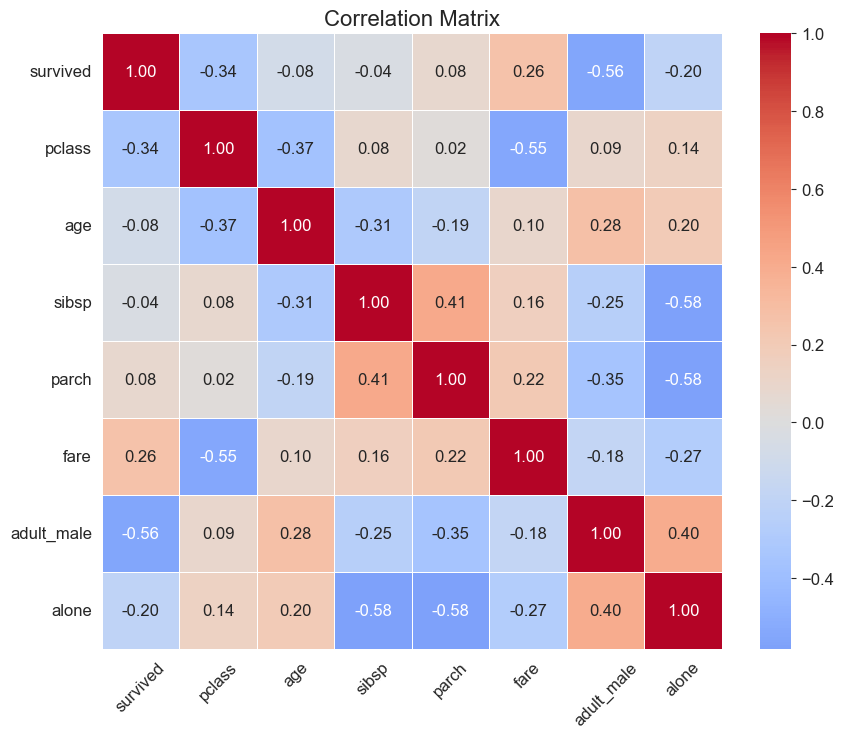

In [11]:
# Relationship Analysis
print("\n" + "="*50)
print("RELATIONSHIP ANALYSIS")
print("="*50)

# Correlation matrix
plt.figure(figsize=(10, 8))
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            annot_kws={'size': 12}, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

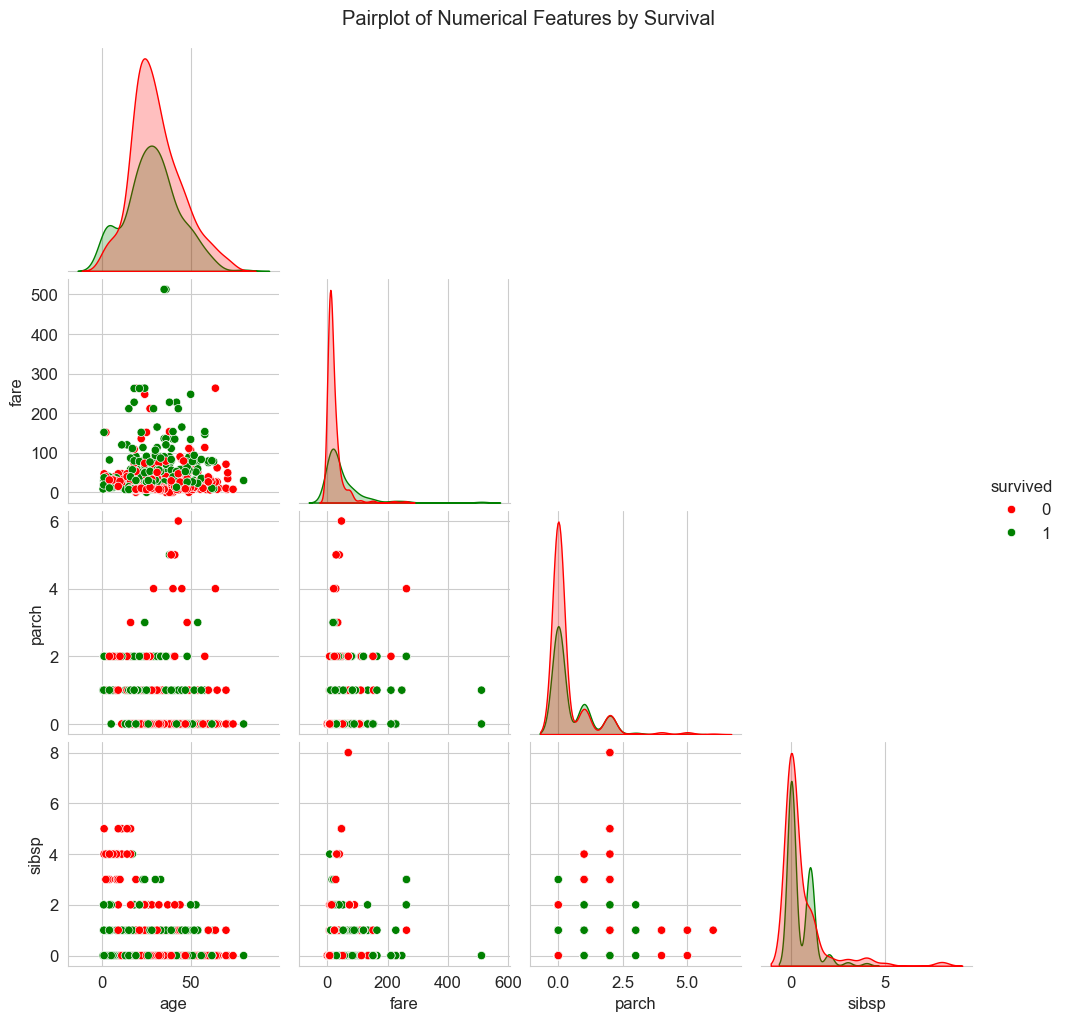

In [12]:
# Pairplot for numerical features
sns.pairplot(titanic[num_cols + ['survived']], hue='survived', 
             palette={0: 'red', 1: 'green'}, corner=True)
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()

<Figure size 1200x800 with 0 Axes>

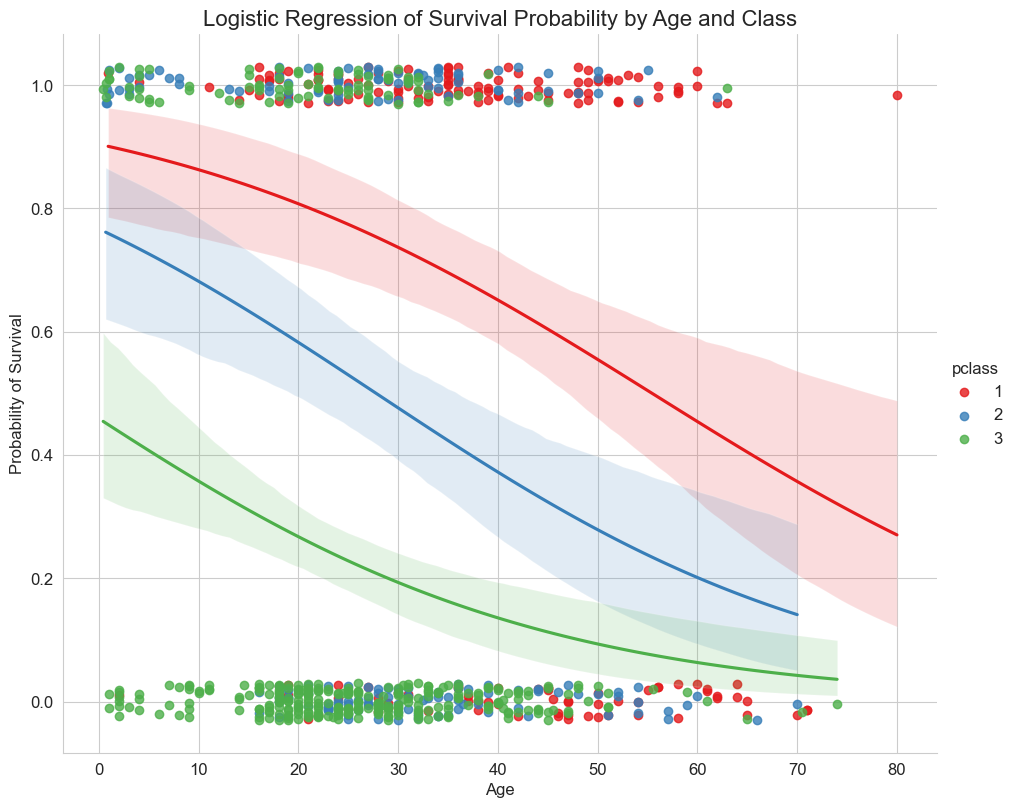

In [13]:
# Advanced visualization: Survival rate by age and class
plt.figure(figsize=(12, 8))
sns.lmplot(x='age', y='survived', data=titanic, logistic=True, 
           hue='pclass', palette='Set1', y_jitter=0.03, height=8, aspect=1.2)
plt.title('Logistic Regression of Survival Probability by Age and Class', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Probability of Survival')
plt.show()

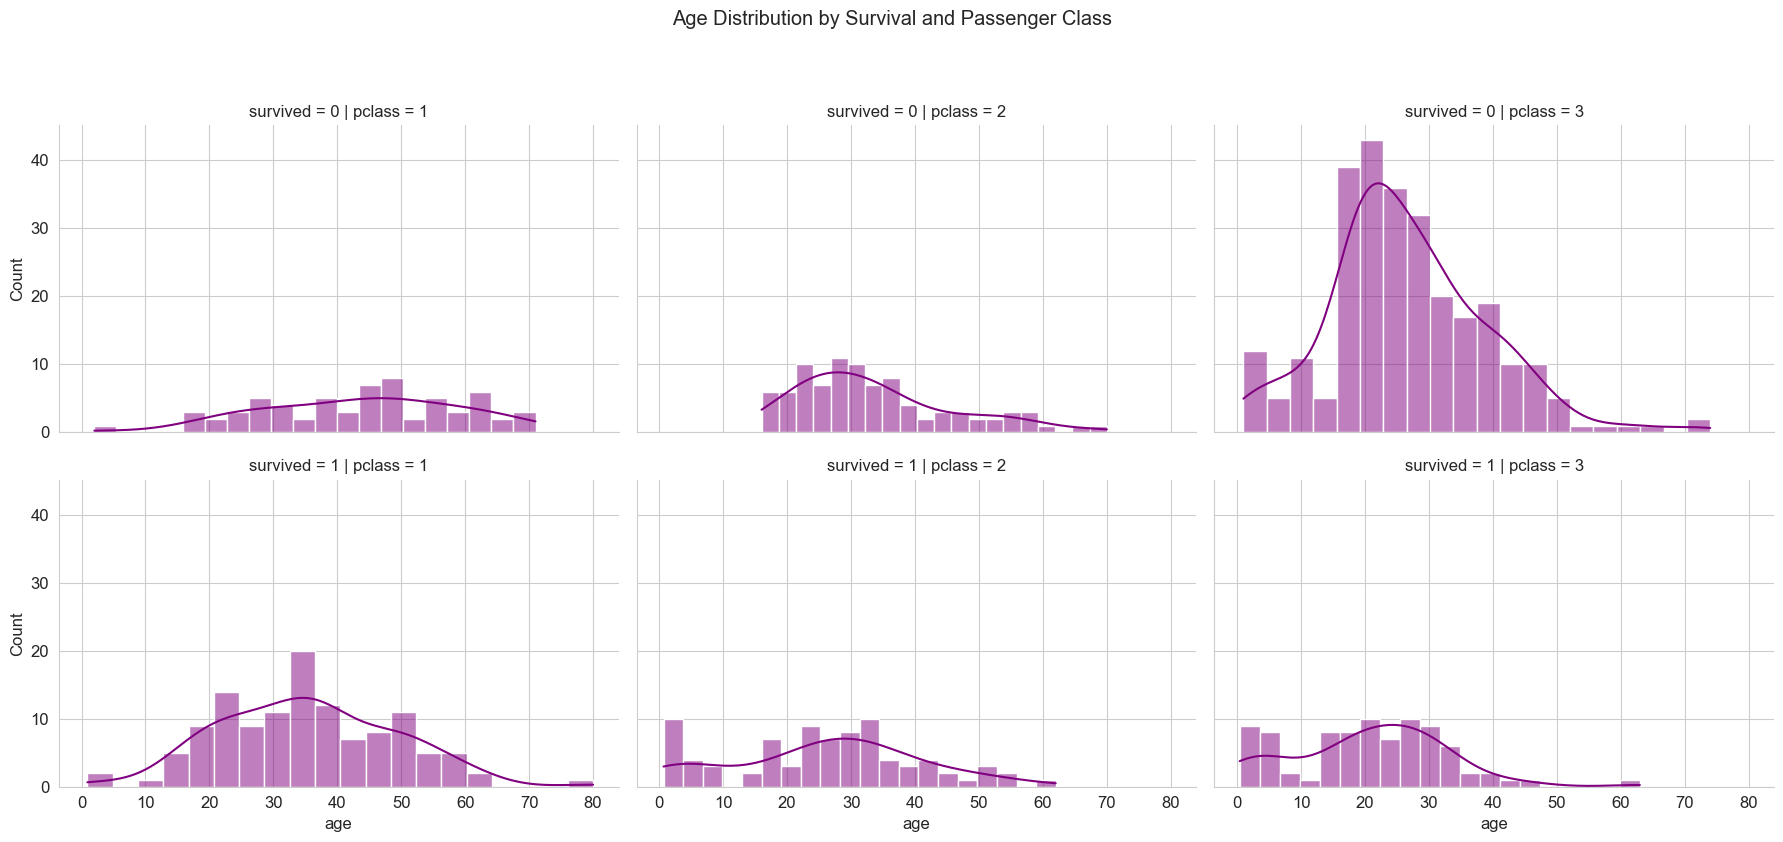

In [14]:
# Advanced visualization: FacetGrid of age distribution by survival and class
g = sns.FacetGrid(titanic, row='survived', col='pclass', height=4, aspect=1.5)
g.map(sns.histplot, 'age', kde=True, bins=20, color='purple')
g.fig.suptitle('Age Distribution by Survival and Passenger Class', y=1.05)
plt.tight_layout()
plt.show()

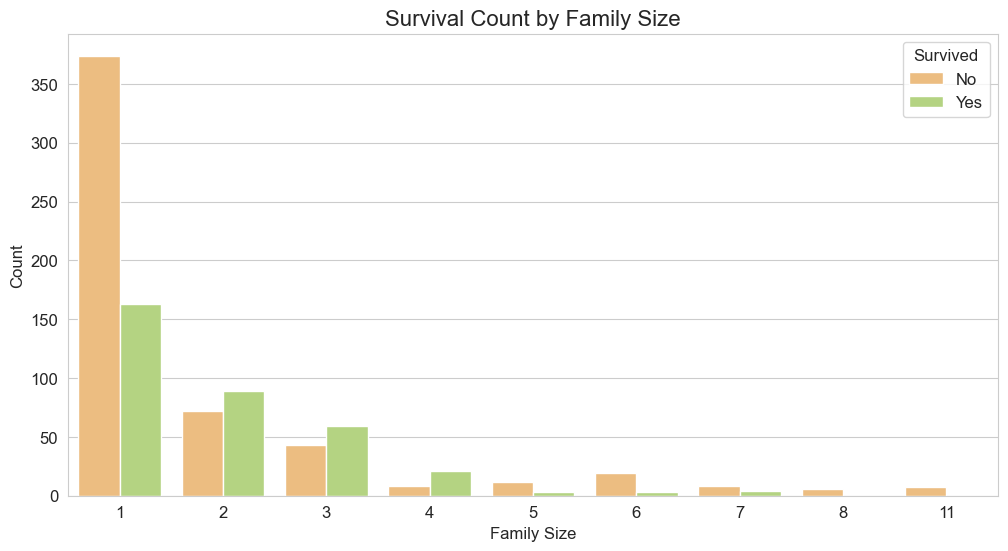

In [15]:
# Advanced analysis: Family size impact on survival
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
plt.figure(figsize=(12, 6))
sns.countplot(x='family_size', hue='survived', data=titanic, palette='RdYlGn')
plt.title('Survival Count by Family Size', fontsize=16)
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

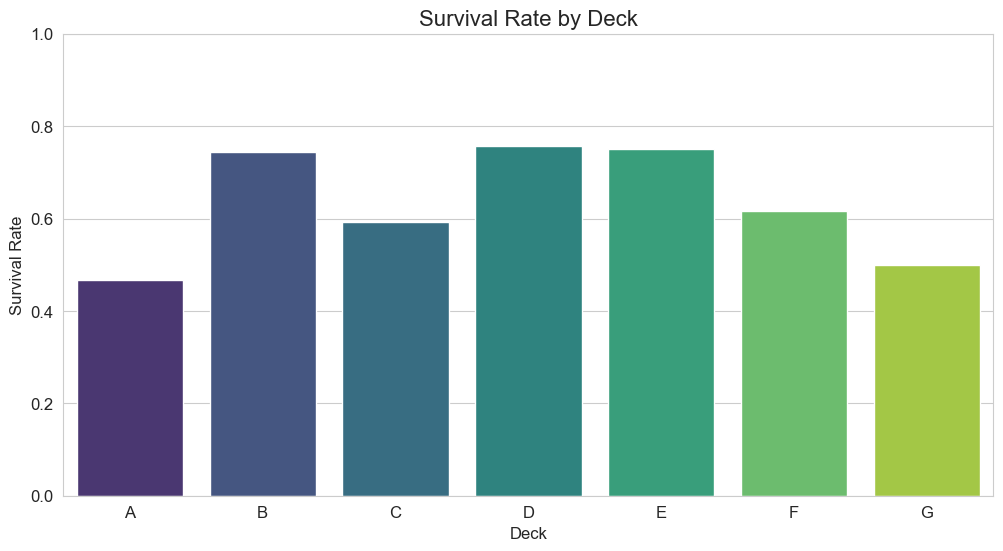

In [16]:
# Advanced visualization: Deck analysis
deck_survival = titanic.groupby('deck', observed=True)['survived'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=deck_survival.index, y=deck_survival.values, hue=deck_survival.index, 
            palette='viridis', legend=False, dodge=False)
plt.title('Survival Rate by Deck', fontsize=16)
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

In [17]:
# Statistical tests for significant differences
print("\n" + "="*50)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*50)

# Age difference between survivors and non-survivors
survived_age = titanic[titanic['survived'] == 1]['age'].dropna()
not_survived_age = titanic[titanic['survived'] == 0]['age'].dropna()
t_stat, p_val = stats.ttest_ind(survived_age, not_survived_age)
print(f"T-test for age difference between survivors and non-survivors:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")


STATISTICAL SIGNIFICANCE TESTS
T-test for age difference between survivors and non-survivors:
T-statistic: -2.0667, P-value: 0.0391


In [18]:
# Fare difference between classes
class1_fare = titanic[titanic['pclass'] == 1]['fare'].dropna()
class2_fare = titanic[titanic['pclass'] == 2]['fare'].dropna()
class3_fare = titanic[titanic['pclass'] == 3]['fare'].dropna()
f_stat, p_val = stats.f_oneway(class1_fare, class2_fare, class3_fare)
print(f"\nANOVA test for fare difference between classes:")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")


ANOVA test for fare difference between classes:
F-statistic: 242.3442, P-value: 0.0000


In [19]:
# Survival rate by gender contingency table
contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])
chi2, p_val, _, _ = stats.chi2_contingency(contingency_table)
print(f"\nChi-square test for survival by gender:")
print(f"Chi2 statistic: {chi2:.4f}, P-value: {p_val:.4f}")


Chi-square test for survival by gender:
Chi2 statistic: 260.7170, P-value: 0.0000


In [26]:
# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [27]:
# INTERACTIVE PLOTLY VISUALIZATIONS
# ======================
#Interactive Survival Rate by Age and Class
fig1 = px.scatter(titanic, x='age', y='fare', color='survived', 
                 facet_col='pclass', hover_name='who',
                 title="<b>Interactive Survival by Age, Fare, and Class</b>",
                 labels={'age': 'Age', 'fare': 'Fare (£)'})
fig1.update_layout(legend_title_text='Survived?')
fig1.show()

#3D Plot of Age, Fare, and Survival
fig2 = px.scatter_3d(titanic, x='age', y='fare', z='pclass',
                    color='survived', symbol='sex',
                    title="<b>3D Survival Analysis: Age, Fare, and Class</b>")
fig2.update_layout(scene=dict(zaxis_title='Class (1=Best)'))
fig2.show()

In [28]:
# MACHINE LEARNING PREP
# ======================
# Compare imputation strategies
def test_imputation(strategy):
    df = titanic.copy()
    imputer = SimpleImputer(strategy=strategy)
    df['age_imputed'] = imputer.fit_transform(df[['age']])
    
    # Train a simple model
    X = df[['age_imputed', 'pclass', 'fare', 'sex']]
    X = pd.get_dummies(X, columns=['sex'], drop_first=True)
    y = df['survived']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [29]:
# Test different imputation methods
strategies = ['mean', 'median', 'most_frequent']
imputation_results = {s: test_imputation(s) for s in strategies}

print("\n" + "="*50)
print("MACHINE LEARNING IMPUTATION COMPARISON")
print("="*50)
for strategy, score in imputation_results.items():
    print(f"{strategy.title()} Imputation Accuracy: {score:.2%}")



MACHINE LEARNING IMPUTATION COMPARISON
Mean Imputation Accuracy: 79.85%
Median Imputation Accuracy: 85.45%
Most_Frequent Imputation Accuracy: 80.60%


In [24]:
# ADVANCED HYPOTHESIS TESTING
# ======================
print("\n" + "="*50)
print("ADVANCED STATISTICAL TESTING")
print("="*50)

# 1. Did 1st-class passengers really survive more?
class1_survival = titanic[titanic['pclass'] == 1]['survived']
class3_survival = titanic[titanic['pclass'] == 3]['survived']
t_stat, p_val = stats.ttest_ind(class1_survival, class3_survival)
print(f"1st vs 3rd Class Survival Difference (T-test): p-value = {p_val:.5f}")

# 2. Is age distribution different between survivors/non-survivors?
survived_age = titanic[titanic['survived'] == 1]['age'].dropna()
not_survived_age = titanic[titanic['survived'] == 0]['age'].dropna()
ks_stat, ks_pval = stats.ks_2samp(survived_age, not_survived_age)
print(f"Age Distribution KS Test: p-value = {ks_pval:.5f}")

# 3. Does family size affect survival? (ANOVA)
family_groups = [titanic[titanic['family_size'] == i]['survived'] 
                for i in sorted(titanic['family_size'].unique())]
f_stat, f_pval = stats.f_oneway(*family_groups)
print(f"Family Size Survival ANOVA: p-value = {f_pval:.5f}")


ADVANCED STATISTICAL TESTING
1st vs 3rd Class Survival Difference (T-test): p-value = 0.00000
Age Distribution KS Test: p-value = 0.12277
Family Size Survival ANOVA: p-value = 0.00000


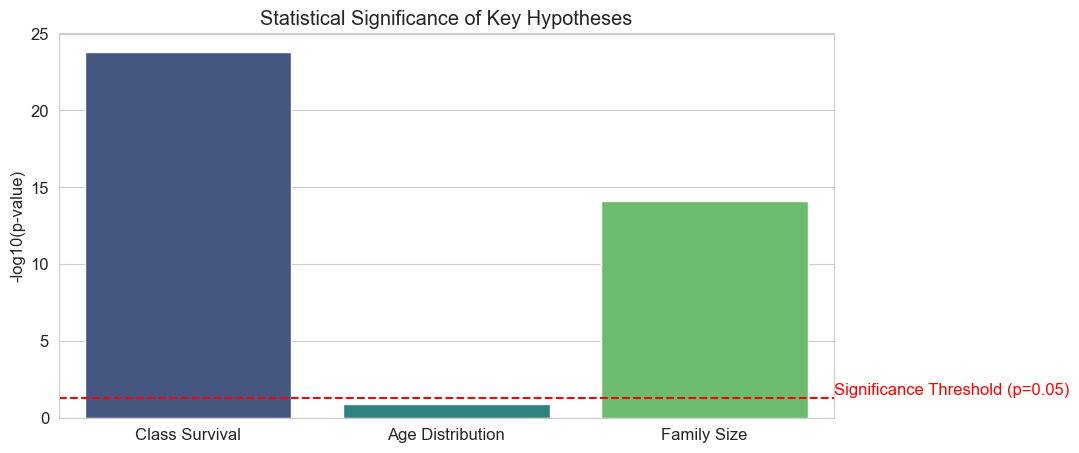

In [30]:
# VISUALIZATION OF TEST RESULTS
# ======================
# Plot p-values
tests = ['Class Survival', 'Age Distribution', 'Family Size']
p_values = [p_val, ks_pval, f_pval]

plt.figure(figsize=(10, 5))
sns.barplot(x=tests, y=-np.log10(p_values), hue=tests, palette='viridis', legend=False, dodge=False)
plt.axhline(-np.log10(0.05), color='red', linestyle='--')
plt.text(2.5, -np.log10(0.05)+0.2, "Significance Threshold (p=0.05)", color='red')
plt.ylabel("-log10(p-value)")
plt.title("Statistical Significance of Key Hypotheses")
plt.show()